# ANLY590 Assignment 1
## Jiaqi Hu
### 1 Regularization

In [1]:
import pandas as pd
Hitters = pd.read_csv("Hitters.csv")
DF  = pd.DataFrame(Hitters)
DF = DF.dropna()

In [2]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [3]:
from sklearn.linear_model import Ridge, Lasso
X = DF.drop(['Unnamed: 0','League','Division','Salary','NewLeague'],axis=1)
Y = DF['Salary']

#### 1.1 Lasso

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_alphas = 200
alphas = np.logspace(-3, 3, n_alphas)

coefs1 = []
for a in alphas:
    lasso = Lasso(alpha=a, normalize = True, max_iter = 5000)
    lasso.fit(X.values, Y.values)
    coefs1.append(lasso.coef_)
    
print(coefs1[100])
for i in range(len(coefs1[100])):
    print("{}\t{}".format(X.columns[i],coefs1[100][i]))
#print(X.head())

[-0.          1.93705001  0.          0.          0.          2.27127924
 -0.          0.          0.          0.04007441  0.24507877  0.36673502
  0.          0.22242632 -0.         -0.        ]
AtBat	-0.0
Hits	1.9370500141129052
HmRun	0.0
Runs	0.0
RBI	0.0
Walks	2.2712792402035378
Years	-0.0
CAtBat	0.0
CHits	0.0
CHmRun	0.04007441282759446
CRuns	0.24507877427041777
CRBI	0.3667350173677341
CWalks	0.0
PutOuts	0.22242632261236944
Assists	-0.0
Errors	-0.0


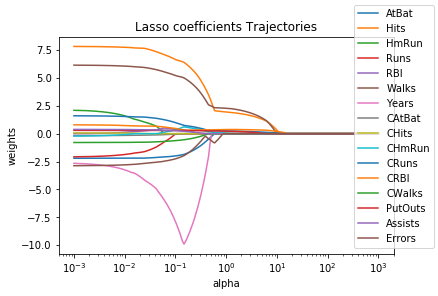

In [7]:
ax = plt.gca()
ax.plot(alphas, coefs1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients Trajectories')
plt.axis('tight')
plt.figlegend(X.columns)
plt.show()

The last three predictors are Hits, Cruns, and CRBI.

In [8]:
from sklearn.model_selection import cross_val_score
n_alphas = 100
alphas = np.logspace(-3, 1, n_alphas)
rmse_scores = []
for a in alphas:
    lasso1 = Lasso(alpha=a, normalize = True, max_iter = 10000)
    scores = cross_val_score(lasso1, X, Y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores.append(np.mean(-scores))

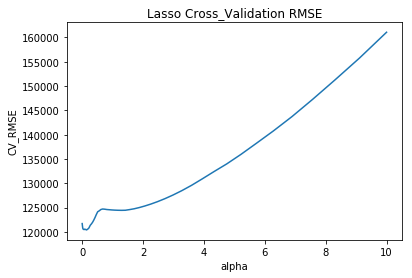

In [9]:
plt.xlabel('alpha')
plt.ylabel('CV_RMSE')
plt.title('Lasso Cross_Validation RMSE')
plt.plot(alphas, rmse_scores)
plt.show()

In [10]:
index = rmse_scores.index(min(rmse_scores))
print(alphas[index], min(rmse_scores))

0.1384886371393873 120416.8531522014


In [11]:
coefs2 = []
lasso2 = Lasso(alpha = alphas[index],normalize = True, max_iter = 5000)
lasso2.fit(X.values, Y.values)
coefs2 = lasso2.coef_
for i in range(len(coefs2)):
    print("{}\t{}".format(X.columns[i],coefs2[i]))

AtBat	-1.890739007025165
Hits	6.447977741736989
HmRun	-0.0
Runs	-0.0
RBI	0.34827636813548113
Walks	5.047195354884967
Years	-9.661215252512052
CAtBat	-0.007098137020465163
CHits	0.0
CHmRun	0.5669675609965851
CRuns	0.7804574971137236
CRBI	0.33130476447663826
CWalks	-0.561546658125262
PutOuts	0.28525942026529666
Assists	0.22378271698959412
Errors	-2.029791993384692


The optimal value of the regularization penality is 0.14, which gives the minimum mean rmse 120416.9  
There are 13 predictors left in the model. All except HmRun, Runs, and CHits.

#### 1.2 Ridge

In [12]:
n_alphas = 200
alphas = np.logspace(-3, 4, n_alphas)

coefs3 = []
for a in alphas:
    ridge = Ridge(alpha=a, normalize = True, max_iter = 5000)
    ridge.fit(X.values, Y.values)
    coefs3.append(ridge.coef_)

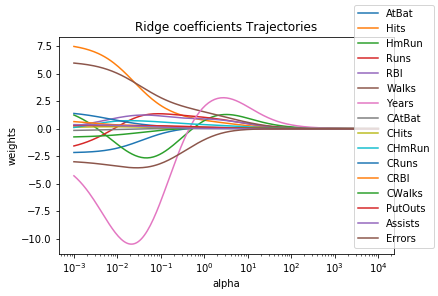

In [13]:
ax = plt.gca()
ax.plot(alphas, coefs3)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients Trajectories')
plt.axis('tight')
plt.figlegend(X.columns)
plt.show()

In [14]:
n_alphas = 100
alphas = np.logspace(-3, 0, n_alphas)
rmse_scores1 = []
for a in alphas:
    ridge1 = Ridge(alpha=a,normalize = True, max_iter = 10000)
    scores = cross_val_score(ridge1, X, Y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores1.append(np.mean(-scores))

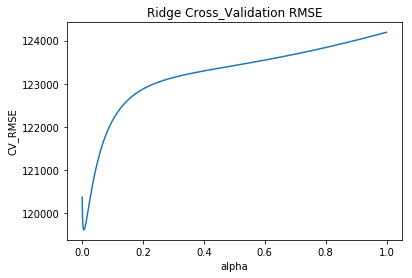

In [15]:
plt.xlabel('alpha')
plt.ylabel('CV_RMSE')
plt.title('Ridge Cross_Validation RMSE')
plt.plot(alphas, rmse_scores1)
plt.show()

In [16]:
index = rmse_scores1.index(min(rmse_scores1))
print(alphas[index], min(rmse_scores1))

0.006579332246575682 119617.47074767659


The optimal panelty of ridge model is 0.0066, which gives the lowest mean rmse score 119617.5

### 2 Short Answer
For a model, if the bias is high,the varience would be low; and if the bias is low, the varience would be high. When a model overfitting,which means that the second situation happends, it would perform well on training data, and bad on test data.
Regularization is a way to prevent overfitting, and it makes the variences lower and make the model smoother by penalizing the coefficients.

From the two RMSE plot of ridge and lasso model in problem 1, we can see that the RMSEs reduce at the beginning and increase later, when penalty is increasing. When penalty is increasing, the varience of the each model is increasing, and the bia is decreasing for training dataset. And when we find the panelty that make test data's RMSE lowest, that is the situation of vias-variance tradeoff. 